First 5 rows of the sampled dataset:
       year      make       model         trim     body transmission  \
2312   2011  Infiniti     G Sedan  G37 Journey  G Sedan    automatic   
16845  2008    Toyota  Highlander      Limited      SUV    automatic   
6105   2013  Chrysler         200      Touring    Sedan    automatic   
18082  2007     Honda      Accord           EX    Coupe       manual   
11335  2011    Toyota       Camry          XLE    Sedan    automatic   

                     vin state  condition  odometer   color interior  \
2312   jn1cv6ap1bm509235    ca       37.0   23476.0    gray    beige   
16845  jtees42a582036341    va       44.0  102670.0  silver     gray   
6105   1c3ccbbb2dn735090    ca       44.0   38933.0   white    black   
18082  1hgcm71777a014456    pa       29.0   61058.0    blue    black   
11335  4t1bk3ek8bu624618    ga       43.0    7794.0       —     gray   

                          seller    mmr  sellingprice  \
2312          nissan infiniti lt  21100 

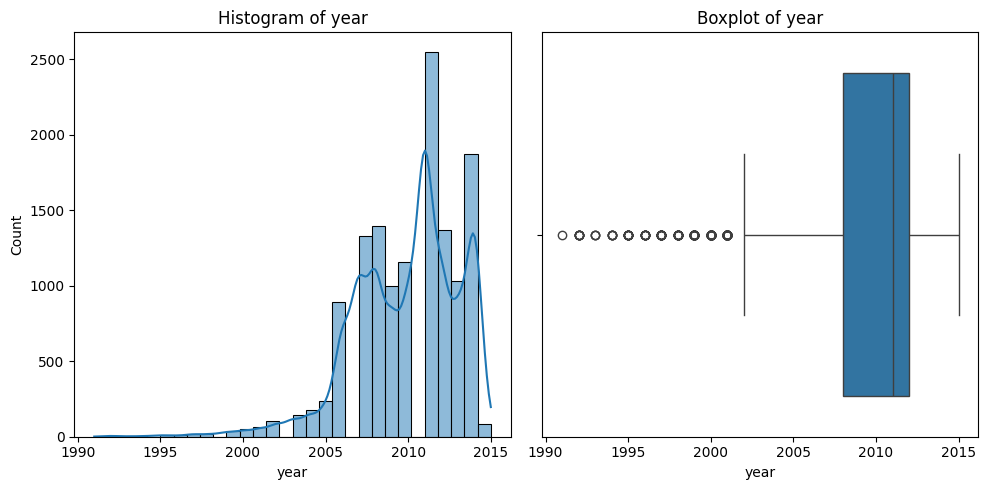

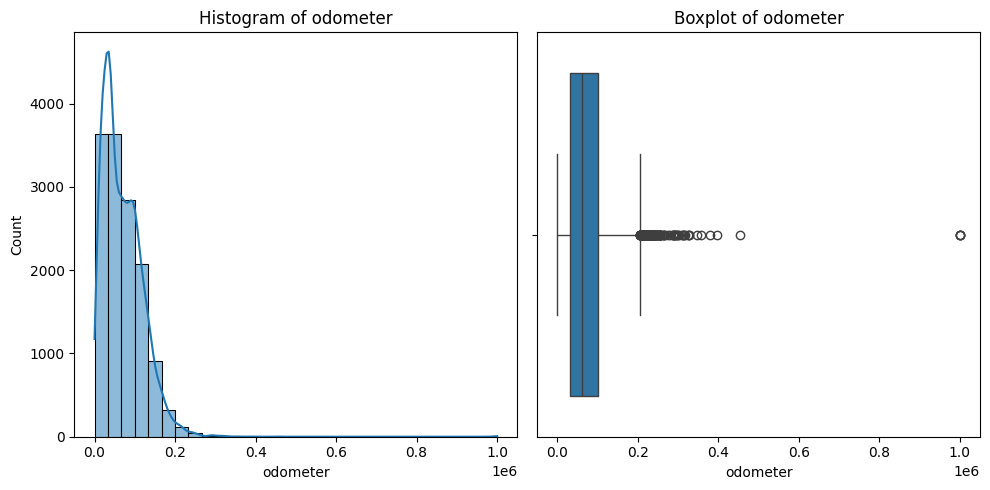

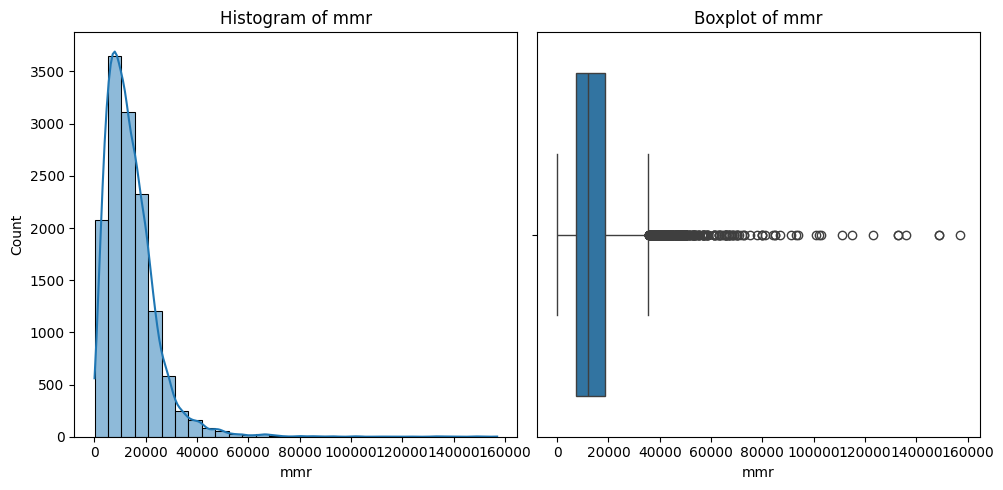

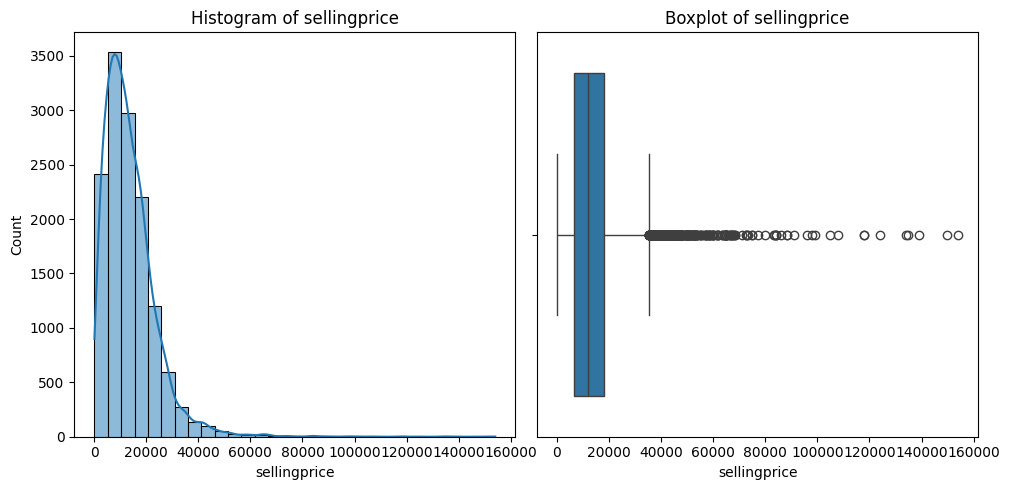

<Figure size 1000x500 with 0 Axes>

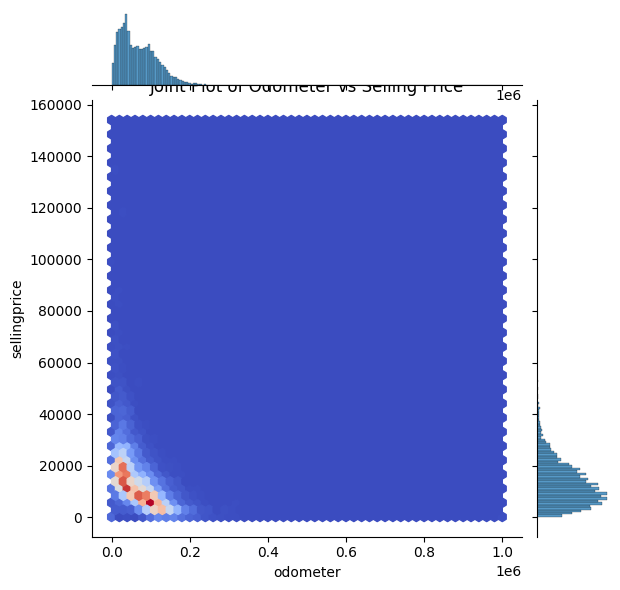

<Figure size 1000x500 with 0 Axes>

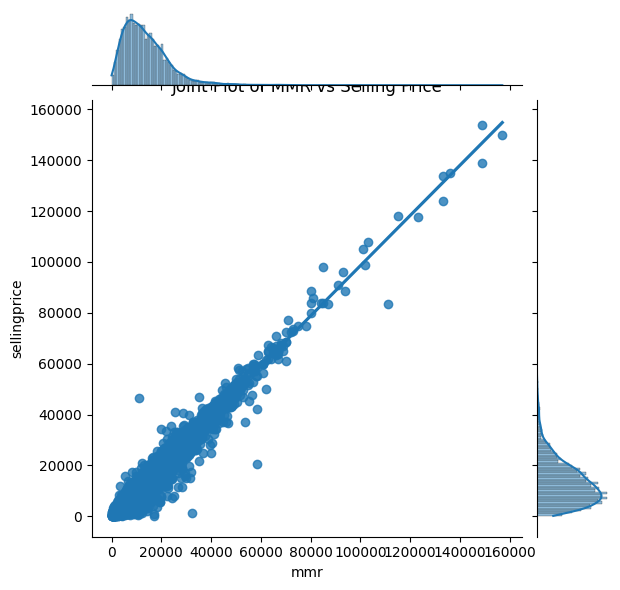


EDA Completed with Sampling of 20,000 Rows and Common Visualizations!


In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the dataset
file_path = '/content/car_prices.csv'
df = pd.read_csv(file_path)

df.head()

df = df.sample(n=20000, random_state=42)  # Adjust `n` to 20,000 rows

# Step 3: Display the first few rows
print("First 5 rows of the sampled dataset:")
print(df.head())

# Step 4: Check for missing values
print("\nMissing values in the dataset:")
print(df.isnull().sum())

# Step 5: Data types and summary statistics
print("\nData types of each column:")
print(df.dtypes)

print("\nSummary statistics of the numerical columns:")
print(df.describe())

# Step 6: Handling missing values
df.dropna(inplace=True)  # Or use df.fillna() to fill missing values

# Step 7: Univariate Analysis with Histograms and Box Plots
numerical_columns = ['year', 'odometer', 'mmr', 'sellingprice']

for col in numerical_columns:
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Histogram of {col}')

    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')

    plt.tight_layout()
    plt.show()

# Step 8: Joint Analysis for Numerical Features
plt.figure(figsize=(10, 5))
sns.jointplot(x='odometer', y='sellingprice', data=df, kind='hex', cmap='coolwarm')
plt.title('Joint Plot of Odometer vs Selling Price')
plt.show()

plt.figure(figsize=(10, 5))
sns.jointplot(x='mmr', y='sellingprice', data=df, kind='reg')
plt.title('Joint Plot of MMR vs Selling Price')
plt.show()

print("\nEDA Completed with Sampling of 20,000 Rows and Common Visualizations!")


In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the dataset
file_path = '/content/car_prices.csv'
df = pd.read_csv(file_path)

df = df.sample(n=20000, random_state=42)

# Step 2: Handling missing values (if not done)
df.dropna(inplace=True)  # Or use df.fillna() to fill missing values

# Step 3: Convert 'saledate' to datetime format, handling timezone offsets
# The utc=True argument will convert all datetimes to UTC,
# resolving potential issues with timezone offsets.
df['saledate'] = pd.to_datetime(df['saledate'], utc=True)

# Step 4: Create new features

# Feature: Sale Year, Month, Day
df['sale_year'] = df['saledate'].dt.year
df['sale_month'] = df['saledate'].dt.month
df['sale_day'] = df['saledate'].dt.day

# Feature: Car Age
df['car_age'] = df['sale_year'] - df['year']

# Feature: Price per Mile (Selling Price / Odometer)
df['price_per_mile'] = df['sellingprice'] / df['odometer']

# Feature: Price Difference from MMR (Selling Price - MMR)
df['price_diff_mmr'] = df['sellingprice'] - df['mmr']

# Feature: Odometer per Year (Odometer / Car Age)
# Ensure car_age is not zero to avoid division by zero
df['odometer_per_year'] = df.apply(lambda x: x['odometer'] / x['car_age'] if x['car_age'] != 0 else 0, axis=1)

# Step 5: Display the new features
print("\nNew features added to the dataset:")
print(df[['sale_year', 'sale_month', 'sale_day', 'car_age', 'price_per_mile', 'price_diff_mmr', 'odometer_per_year']].head())

<ipython-input-97-1c951cd4b3d7>:18: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['saledate'] = pd.to_datetime(df['saledate'], utc=True)



New features added to the dataset:
       sale_year  sale_month  sale_day  car_age  price_per_mile  \
2312        2014          12        18        3        0.894531   
16845       2014          12        18        6        0.162657   
6105        2014          12        17        1        0.279968   
18082       2015           1         9        8        0.124472   
11335       2014          12        18        3        2.104183   

       price_diff_mmr  odometer_per_year  
2312             -100        7825.333333  
16845             500       17111.666667  
6105              300       38933.000000  
18082             200        7632.250000  
11335             200        2598.000000  


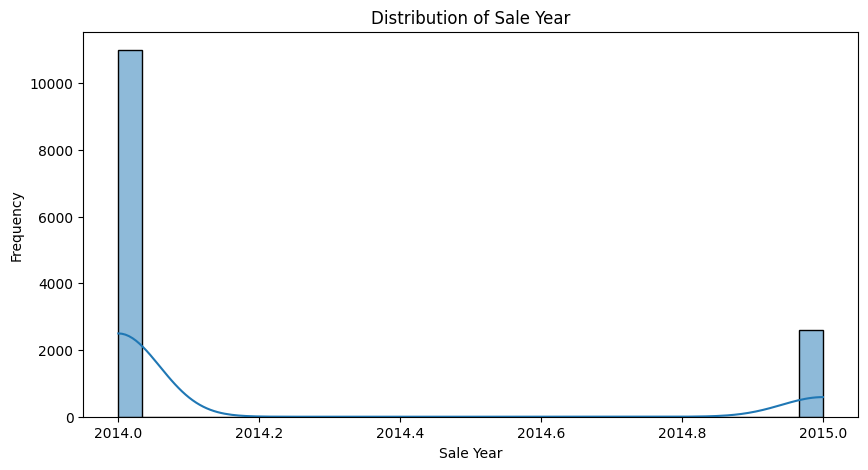

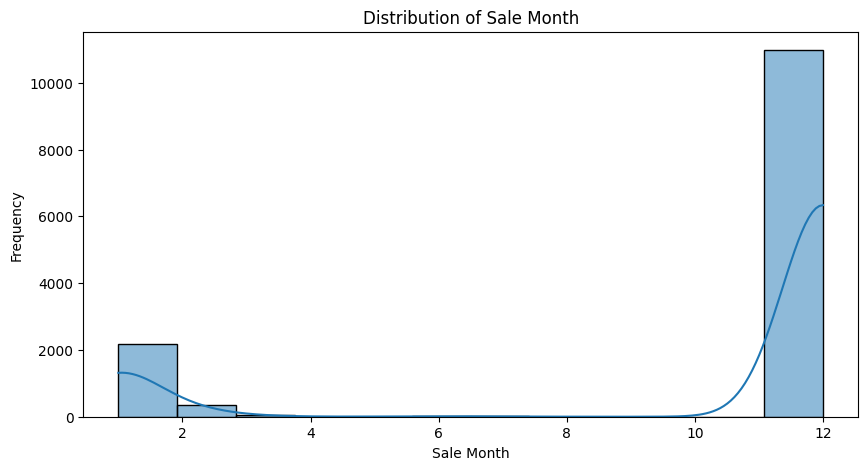

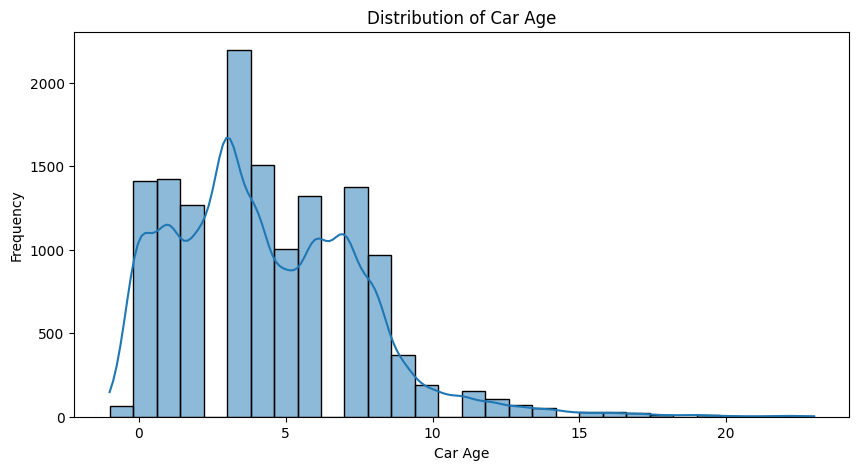

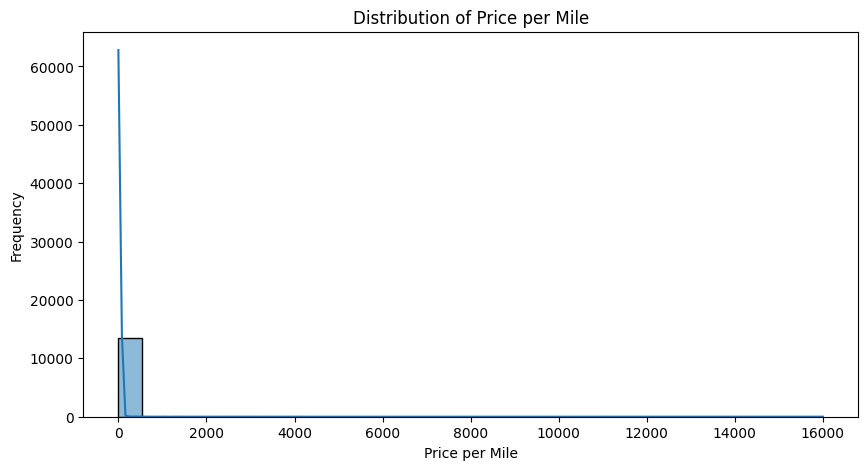

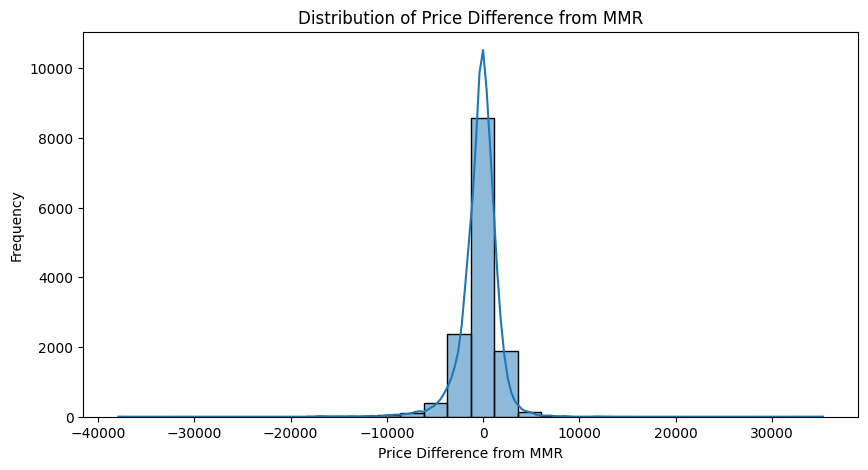

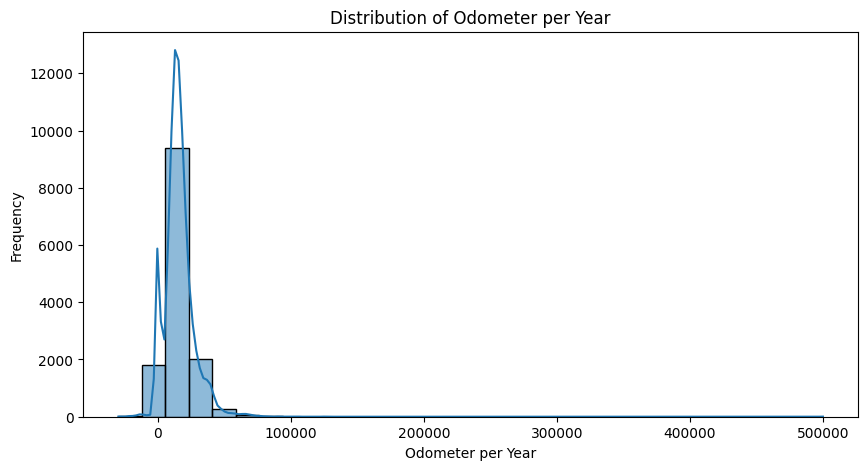

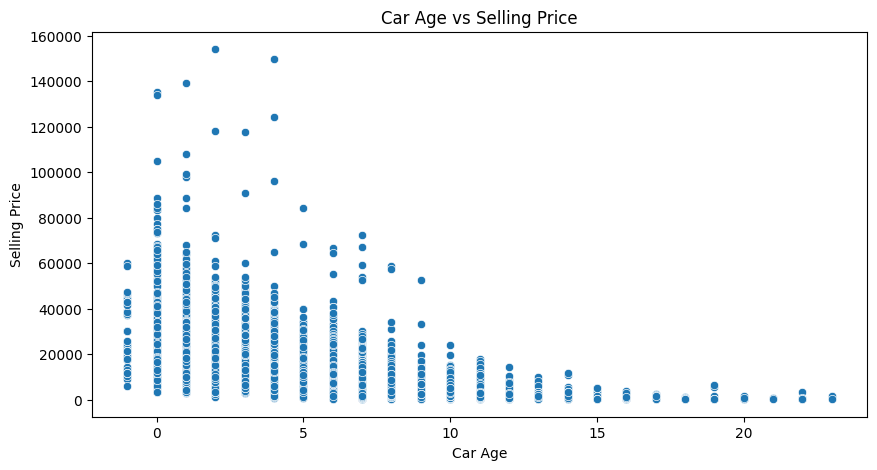

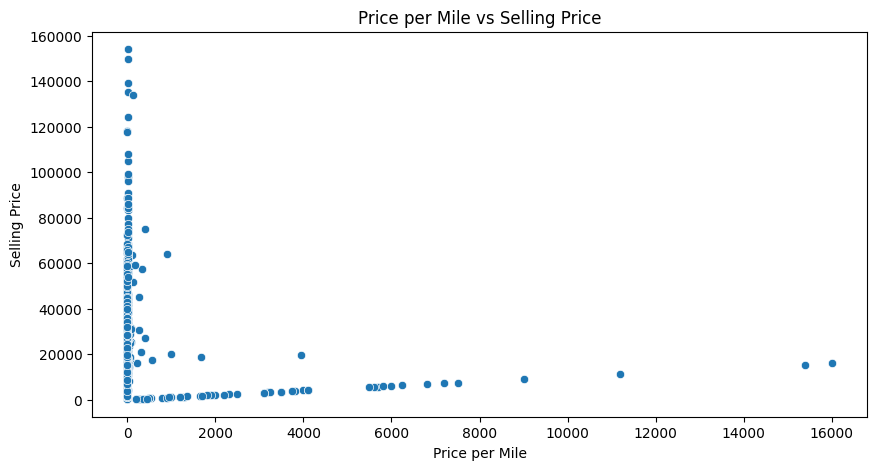

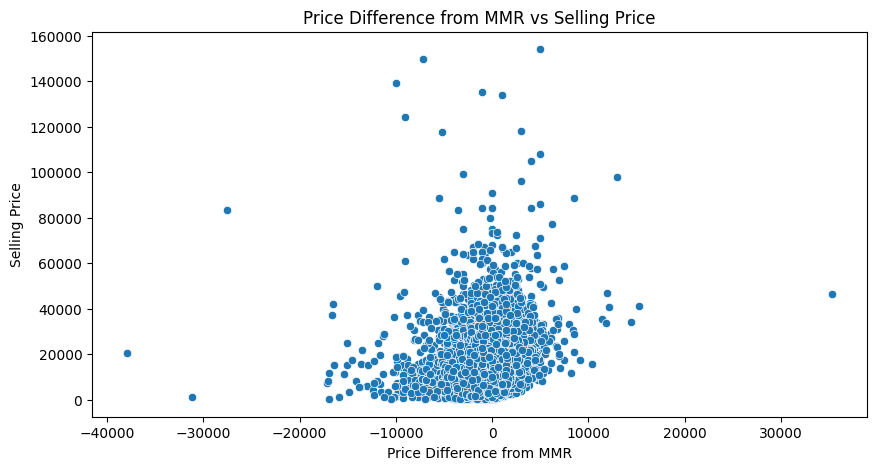

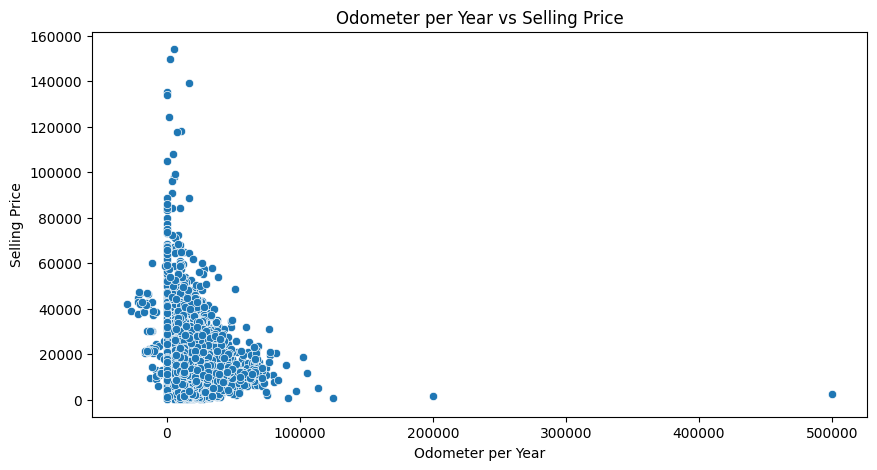

In [98]:
# 1. Distribution of Sale Year
plt.figure(figsize=(10, 5))
sns.histplot(df['sale_year'], bins=30, kde=True)
plt.title('Distribution of Sale Year')
plt.xlabel('Sale Year')
plt.ylabel('Frequency')
plt.show()

# 2. Distribution of Sale Month
plt.figure(figsize=(10, 5))
sns.histplot(df['sale_month'], bins=12, kde=True)
plt.title('Distribution of Sale Month')
plt.xlabel('Sale Month')
plt.ylabel('Frequency')
plt.show()

# 3. Distribution of Car Age
plt.figure(figsize=(10, 5))
sns.histplot(df['car_age'], bins=30, kde=True)
plt.title('Distribution of Car Age')
plt.xlabel('Car Age')
plt.ylabel('Frequency')
plt.show()

# 4. Distribution of Price per Mile
plt.figure(figsize=(10, 5))
sns.histplot(df['price_per_mile'], bins=30, kde=True)
plt.title('Distribution of Price per Mile')
plt.xlabel('Price per Mile')
plt.ylabel('Frequency')
plt.show()

# 5. Distribution of Price Difference from MMR
plt.figure(figsize=(10, 5))
sns.histplot(df['price_diff_mmr'], bins=30, kde=True)
plt.title('Distribution of Price Difference from MMR')
plt.xlabel('Price Difference from MMR')
plt.ylabel('Frequency')
plt.show()

# 6. Distribution of Odometer per Year
plt.figure(figsize=(10, 5))
sns.histplot(df['odometer_per_year'], bins=30, kde=True)
plt.title('Distribution of Odometer per Year')
plt.xlabel('Odometer per Year')
plt.ylabel('Frequency')
plt.show()

# 7. Car Age vs Selling Price
plt.figure(figsize=(10, 5))
sns.scatterplot(x='car_age', y='sellingprice', data=df)
plt.title('Car Age vs Selling Price')
plt.xlabel('Car Age')
plt.ylabel('Selling Price')
plt.show()

# 8. Price per Mile vs Selling Price
plt.figure(figsize=(10, 5))
sns.scatterplot(x='price_per_mile', y='sellingprice', data=df)
plt.title('Price per Mile vs Selling Price')
plt.xlabel('Price per Mile')
plt.ylabel('Selling Price')
plt.show()

# 9. Price Difference from MMR vs Selling Price
plt.figure(figsize=(10, 5))
sns.scatterplot(x='price_diff_mmr', y='sellingprice', data=df)
plt.title('Price Difference from MMR vs Selling Price')
plt.xlabel('Price Difference from MMR')
plt.ylabel('Selling Price')
plt.show()

# 10. Odometer per Year vs Selling Price
plt.figure(figsize=(10, 5))
sns.scatterplot(x='odometer_per_year', y='sellingprice', data=df)
plt.title('Odometer per Year vs Selling Price')
plt.xlabel('Odometer per Year')
plt.ylabel('Selling Price')
plt.show()

<ipython-input-99-b0d8ccf5b63d>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-99-b0d8ccf5b63d>:5: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 2}` instead.

  sns.barplot(


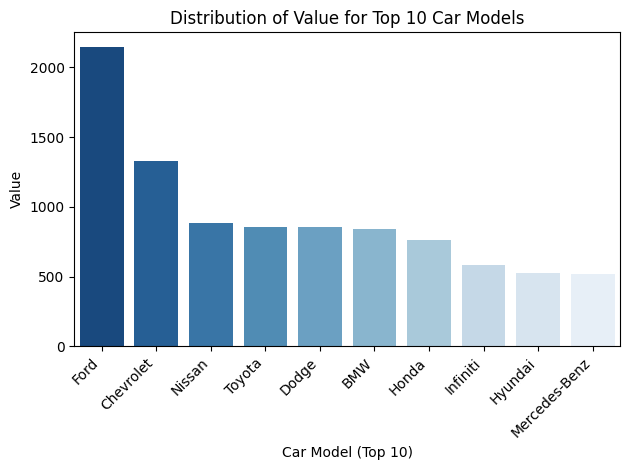

In [99]:
values = df["make"].value_counts().sort_values(ascending=False)
val = values.values
model = values.index

sns.barplot(
    x=model[0:10],
    y=val[0:10],
    palette="Blues_r",
    errwidth=2,
    capsize=7,
)

plt.xlabel("Car Model (Top 10)")
plt.ylabel("Value")
plt.title("Distribution of Value for Top 10 Car Models")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

plt.show()

<ipython-input-100-8dfb68a02fc4>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


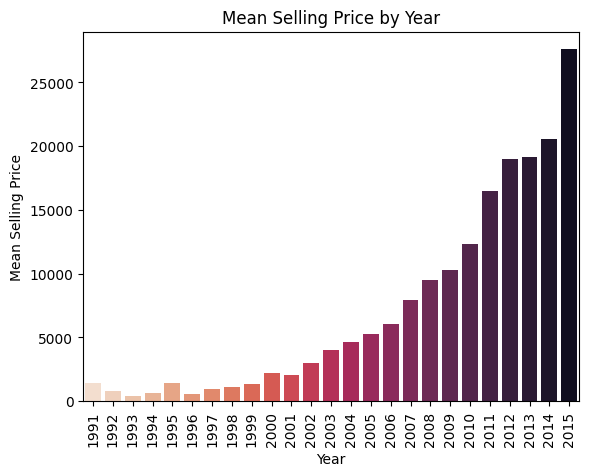

In [100]:
yearly_mean_price = (
    df.groupby("year", as_index=False)["sellingprice"].mean()
).round(2)

sns.barplot(
    x=yearly_mean_price["year"],
    y=yearly_mean_price["sellingprice"],
    palette="rocket_r",
)

plt.title("Mean Selling Price by Year")
plt.xlabel("Year")
plt.ylabel("Mean Selling Price")
plt.xticks(rotation=90)

plt.show()

<ipython-input-101-a1ed0eeb84a6>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=make_price[0:5], x="make", y="sellingprice", ax=axs[0], palette='YlOrBr_r')
<ipython-input-101-a1ed0eeb84a6>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=45, ha="right")
<ipython-input-101-a1ed0eeb84a6>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=make_price[-6:-1], x="make", y="sellingprice", ax=axs[1],palette='YlOrBr_r')
<ipython-input-101-a1ed0eeb84a6>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=45, ha="ri

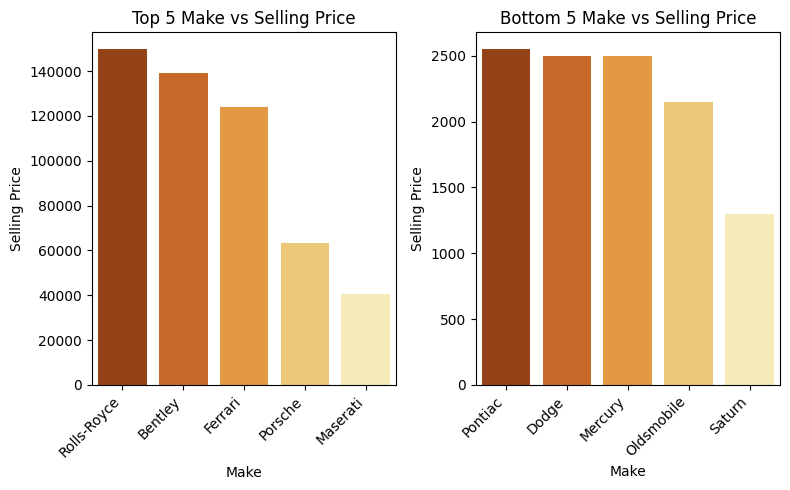

In [101]:
make_price = df.groupby(by="make", as_index=False)["sellingprice"].first()
make_price.sort_values(by="sellingprice", ascending=False, inplace=True)
fig, axs = plt.subplots(1, 2, figsize=(8, 5))


sns.barplot(data=make_price[0:5], x="make", y="sellingprice", ax=axs[0], palette='YlOrBr_r')
axs[0].set_title("Top 5 Make vs Selling Price")
axs[0].set_xlabel("Make")
axs[0].set_ylabel("Selling Price")
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=45, ha="right")


sns.barplot(data=make_price[-6:-1], x="make", y="sellingprice", ax=axs[1],palette='YlOrBr_r')
axs[1].set_title("Bottom 5 Make vs Selling Price")
axs[1].set_xlabel("Make")
axs[1].set_ylabel("Selling Price")
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=45, ha="right")


plt.tight_layout()


plt.show()

***MODEL BUILDING***

In [102]:
df

,year,make,model,trim,body,transmission,vin,state,condition,odometer,...,mmr,sellingprice,saledate,sale_year,sale_month,sale_day,car_age,price_per_mile,price_diff_mmr,odometer_per_year
2312,2011,Infiniti,G Sedan,G37 Journey,G Sedan,automatic,jn1cv6ap1bm509235,ca,37.0,23476.0,...,21100,21000,2014-12-18 04:30:00+00:00,2014,12,18,3,0.894531,-100,7825.333333
16845,2008,Toyota,Highlander,Limited,SUV,automatic,jtees42a582036341,va,44.0,102670.0,...,16200,16700,2014-12-18 01:35:00+00:00,2014,12,18,6,0.162657,500,17111.666667
6105,2013,Chrysler,200,Touring,Sedan,automatic,1c3ccbbb2dn735090,ca,44.0,38933.0,...,10600,10900,2014-12-17 04:30:00+00:00,2014,12,17,1,0.279968,300,38933.000000
18082,2007,Honda,Accord,EX,Coupe,manual,1hgcm71777a014456,pa,29.0,61058.0,...,7400,7600,2015-01-09 01:00:00+00:00,2015,1,9,8,0.124472,200,7632.250000
11335,2011,Toyota,Camry,XLE,Sedan,automatic,4t1bk3ek8bu624618,ga,43.0,7794.0,...,16200,16400,2014-12-18 02:00:00+00:00,2014,12,18,3,2.104183,200,2598.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3368,2007,Jeep,Wrangler,Unlimited Sahara,SUV,manual,1j4gb59177l160879,ca,19.0,92300.0,...,14150,12250,2014-12-18 04:00:00+00:00,2014,12,18,7,0.132719,-1900,13185.714286
11559,2010,Buick,LaCrosse,CXL,Sedan,automatic,1g4gc5gg5af316011,fl,36.0,52752.0,...,12900,15400,2014-12-18 01:50:00+00:00,2014,12,18,4,0.291932,2500,13188.000000
7196,2005,Audi,A4,3.2 quattro,Sedan,automatic,waudg68e75a505029,ca,34.0,105506.0,...,4075,7000,2014-12-17 04:15:00+00:00,2014,12,17,9,0.066347,2925,11722.888889
11641,2010,Chevrolet,Camaro,2SS,Coupe,manual,2g1ft1ew3a9206143,tx,38.0,28027.0,...,21400,19500,2014-12-17 02:20:00+00:00,2014,12,17,4,0.695758,-1900,7006.750000


In [103]:
y = df['sellingprice']

feature_columns = ['year', 'make', 'model', 'odometer', 'condition']
X = df[feature_columns]

In [104]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**LINEAR REGRESSION**

In [106]:
print(y_test)

14498     8200
304      18400
11155    13200
4396     12000
16936     8500
         ...  
2145     20500
597      12900
2905     10800
19596     4800
4154      7200
Name: sellingprice, Length: 2718, dtype: int64


In [107]:
y = df['sellingprice']
feature_columns = ['year', 'make', 'model', 'odometer', 'condition']
X = df[feature_columns]

categorical_features = ['make', 'model']
numerical_features = ['year', 'odometer', 'condition']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])
model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(y_pred)
print(f'Linear Regression MSE: {mean_squared_error(y_test, y_pred)}')
print(f'Linear Regression R² score: {r2_score(y_test, y_pred)}')

[ 8914.44331776 19370.29353467 15161.08116877 ... 13545.11356882
  7604.98686825  9038.33259462]
Linear Regression MSE: 54502011.38834128
Linear Regression R² score: 0.4939954375335259


**DECISION TREE REGRESSOR**

In [108]:
numerical_features = ['year', 'odometer', 'condition']
categorical_features = ['make', 'model']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

tree_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor(random_state=42))
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tree_pipeline.fit(X_train, y_train)

y_pred = tree_pipeline.predict(X_test)
print(y_pred)
print(f'Decision Tree MSE: {mean_squared_error(y_test, y_pred)}')
print(f'Decision Tree R² score: {r2_score(y_test, y_pred)}')

[ 8200. 18600. 12900. ...  7500.  4000.  4200.]
Decision Tree MSE: 32699581.59602649
Decision Tree R² score: 0.6964123514554621


**XGBOOST REGRESSOR**

In [109]:
# Identify numerical and categorical features
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Creating a pipeline that includes preprocessing and the model
xgb_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor(random_state=42))
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgb_pipeline.fit(X_train, y_train)

y_pred = xgb_pipeline.predict(X_test)
print(y_pred)
print(f'XGBoost MSE: {mean_squared_error(y_test, y_pred)}')
print(f'XGBoost R² score: {r2_score(y_test, y_pred)}')

[ 9472.311  19398.105  12325.673  ... 11319.038   4782.8384  6456.0757]
XGBoost MSE: 19044108.56971552
XGBoost R² score: 0.8231917395539592


**Purpose :** The primary goal is to predict the selling price of cars based on various attributes, helping understand the factors that most influence car prices.

**Insights :** Through these models, one can identify the features that significantly impact the car's selling price, such as make, model, year, odometer readings, and condition.

**Effectiveness :** The models' effectiveness can be gauged by their R² scores and MSE values, indicating how well they can predict car prices based on the given features.

**Performance Ranking :** XGBoost Regressor appears to be the most effective, followed by Decision tree regressor and Linear Regression.

**Predictive Factors : **The models, especially XGBoost, can help identify the most significant factors affecting car prices, likely to be features like the make, model, year, condition, and odometer readings of the cars.

**Model Selection :** For this specific case, XGBoost would be preferable due to their superior handling of complex data patterns and their ability to manage different data types effectively. These models help understand the dynamics of car pricing and can be used to guide decision-making for sellers and buyers, by identifying key features that influence the selling price of a car. ​XGBoost Regressor has the lowest MSE (12,87,731), suggesting it has the smallest average error in predicting car prices. R² score of 0.98 for the XGBoost Regressor means that 98% of the variability in car selling prices can be explained by the model's inputs.

In [110]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor

# ... (Your existing code for data loading, preprocessing, and model training)

# Linear Regression Predictions
y_pred_linear = model.predict(X_test)
pd.DataFrame(y_pred_linear).to_csv('linear_regression_predictions.csv', index=False, header=['Predictions'])

# Decision Tree Predictions
y_pred_tree = tree_pipeline.predict(X_test)
pd.DataFrame(y_pred_tree).to_csv('decision_tree_predictions.csv', index=False, header=['Predictions'])

# XGBoost Predictions
y_pred_xgb = xgb_pipeline.predict(X_test)
pd.DataFrame(y_pred_xgb).to_csv('xgboost_predictions.csv', index=False, header=['Predictions'])

print("Predictions saved to CSV files.")


Predictions saved to CSV files.


In [111]:
import pickle

# Assuming 'xgb_pipeline' is your best performing model
with open('car_price_model.pkl', 'wb') as file:
  pickle.dump(xgb_pipeline, file)

print("Model saved as car_price_model.pkl")


Model saved as car_price_model.pkl
